In [1]:
import pandas as pd
import numpy as np

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample=pd.read_csv('sample_submission.csv')

In [3]:
pd.set_option('display.max_column',None)
#pd.set_option("display.max_rows", None)

In [4]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [5]:
sample.head(2)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989


In [6]:
train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
272,273,60,RL,92.0,11764,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,7,1999,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,348.0,Gd,TA,PConc,Gd,TA,No,GLQ,524,Unf,0,628,1152,GasA,Ex,Y,SBrkr,1164,1106,0,2270,0,0,2,1,4,1,Gd,9,Typ,1,Gd,Attchd,1999.0,Fin,3,671,TA,TA,Y,132,57,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,290000
203,204,120,RM,NaN,4438,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,205.0,Gd,TA,PConc,Gd,TA,Av,GLQ,662,Unf,0,186,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3,Typ,1,Gd,Attchd,2004.0,RFn,2,420,TA,TA,Y,149,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,149000
211,212,20,RL,83.0,10420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2009,2009,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,Mn,GLQ,36,Unf,0,1176,1212,GasA,Ex,Y,SBrkr,1212,0,0,1212,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2009.0,RFn,2,460,TA,TA,Y,100,22,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,186000
958,959,20,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,699,Unf,0,638,1337,GasA,Ex,Y,SBrkr,1337,0,0,1337,1,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2003.0,RFn,2,531,TA,TA,Y,0,39,0,0,0,0,NaN,NaN,NaN,0,10,2007,WD,Normal,185000
1114,1115,20,RL,90.0,5400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,7,1954,2000,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Rec,415,Unf,0,418,833,GasA,Ex,Y,SBrkr,833,0,0,833,0,0,1,0,2,1,Gd,4,Typ,0,NaN,Detchd,1955.0,Unf,1,326,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,8,2006,WD,Normal,117000


In [7]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [8]:
y=train['SalePrice'].values
train.drop('SalePrice', axis=1, inplace=True)

In [9]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 80, dtype: int64

In [12]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [13]:
df=pd.concat([train,test],axis=0,ignore_index=True)
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal


In [14]:
df.shape

(2919, 80)

In [15]:
for i in range(len(df.iloc[0,:])):
    print([i+1,df.iloc[:,i].isnull().sum()])

[1, 0]
[2, 0]
[3, 4]
[4, 486]
[5, 0]
[6, 0]
[7, 2721]
[8, 0]
[9, 0]
[10, 2]
[11, 0]
[12, 0]
[13, 0]
[14, 0]
[15, 0]
[16, 0]
[17, 0]
[18, 0]
[19, 0]
[20, 0]
[21, 0]
[22, 0]
[23, 0]
[24, 1]
[25, 1]
[26, 24]
[27, 23]
[28, 0]
[29, 0]
[30, 0]
[31, 81]
[32, 82]
[33, 82]
[34, 79]
[35, 1]
[36, 80]
[37, 1]
[38, 1]
[39, 1]
[40, 0]
[41, 0]
[42, 0]
[43, 1]
[44, 0]
[45, 0]
[46, 0]
[47, 0]
[48, 2]
[49, 2]
[50, 0]
[51, 0]
[52, 0]
[53, 0]
[54, 1]
[55, 0]
[56, 2]
[57, 0]
[58, 1420]
[59, 157]
[60, 159]
[61, 159]
[62, 1]
[63, 1]
[64, 159]
[65, 159]
[66, 0]
[67, 0]
[68, 0]
[69, 0]
[70, 0]
[71, 0]
[72, 0]
[73, 2909]
[74, 2348]
[75, 2814]
[76, 0]
[77, 0]
[78, 0]
[79, 1]
[80, 0]


In [16]:
import seaborn as sns
import  matplotlib.pyplot as plt

<AxesSubplot:>

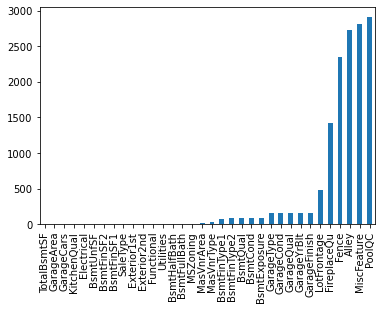

In [17]:
missing=df.isnull().sum()
missing=missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

**Float Values**

In [18]:
floatValue=df.select_dtypes(include=[np.float])
floatValue.columns

C:\Users\Admin\AppData\Local\Temp/ipykernel_9932/2997126401.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  floatValue=df.select_dtypes(include=[np.float])


Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

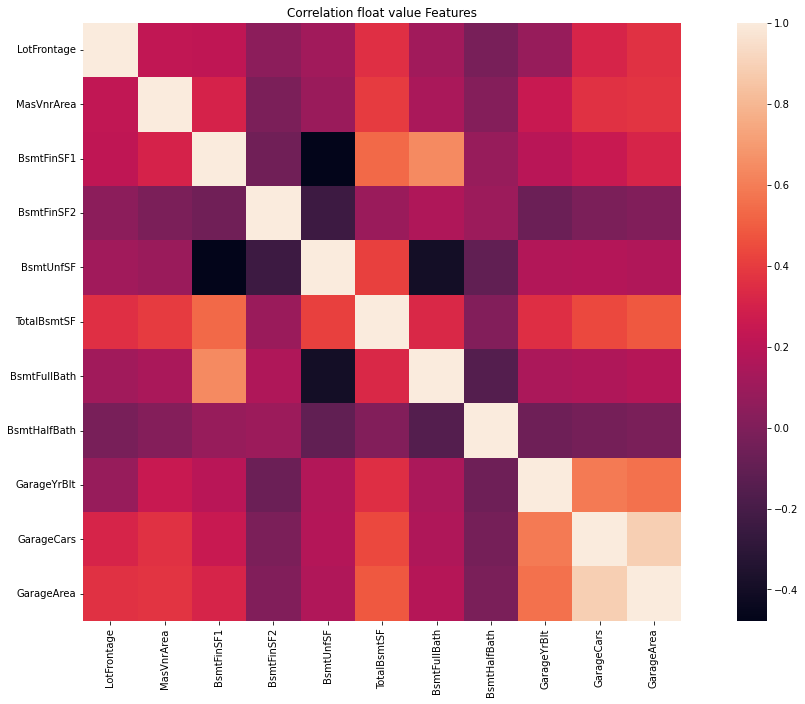

In [19]:
f,ax=plt.subplots(figsize=(20,11))
sns.heatmap(floatValue.corr(),square=True,vmax=1)
plt.title("Correlation float value Features")
plt.show()

In [20]:
floatValue.isnull().sum()

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

**int Values**

In [21]:
intValue=df.select_dtypes(include=[np.int])
intValue.columns

C:\Users\Admin\AppData\Local\Temp/ipykernel_9932/3471876566.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  intValue=df.select_dtypes(include=[np.int])


Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [22]:
intValue.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

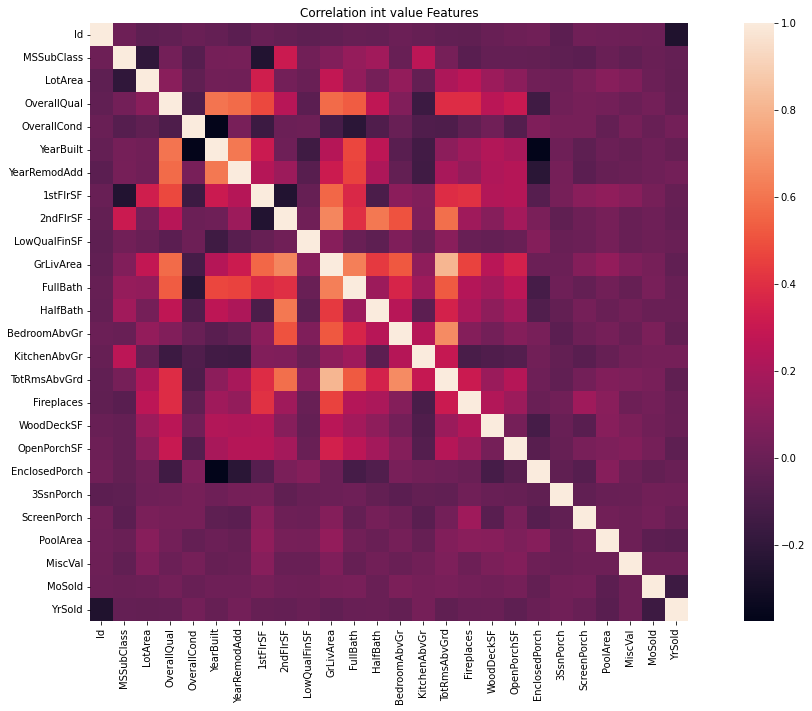

In [23]:
f,ax=plt.subplots(figsize=(20,11))
sns.heatmap(intValue.corr(),square=True,vmax=1)
plt.title("Correlation int value Features")
plt.show()

**Object**

In [24]:
categorical=df.select_dtypes(include=[np.object])
categorical.columns

C:\Users\Admin\AppData\Local\Temp/ipykernel_9932/2946250256.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical=df.select_dtypes(include=[np.object])


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [25]:
categorical.isnull().sum()

MSZoning            4
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
PoolQC           2909
Fence            2348
MiscFeature      2814
SaleType            1
SaleCondition       0
dtype: int64

In [26]:
for i in categorical.columns:
    print(f"{i}:  {categorical[i].unique()}")

MSZoning:  ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
Street:  ['Pave' 'Grvl']
Alley:  [nan 'Grvl' 'Pave']
LotShape:  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour:  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities:  ['AllPub' 'NoSeWa' nan]
LotConfig:  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope:  ['Gtl' 'Mod' 'Sev']
Neighborhood:  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1:  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2:  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType:  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle:  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle:  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl:  ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyT

***Handling Missing Values***

float columns Null Values replace with zeros

In [27]:
f_features=['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea']

In [28]:
df[f_features]=df[f_features].fillna(0)

In [29]:
df[f_features].head(4)

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,65.0,196.0,706.0,0.0,150.0,856.0,1.0,0.0,2003.0,2.0,548.0
1,80.0,0.0,978.0,0.0,284.0,1262.0,0.0,1.0,1976.0,2.0,460.0
2,68.0,162.0,486.0,0.0,434.0,920.0,1.0,0.0,2001.0,2.0,608.0
3,60.0,0.0,216.0,0.0,540.0,756.0,1.0,0.0,1998.0,3.0,642.0


In int values columns does't have null values 

**Replacing Null values with string**

In [30]:
categorical.head(10)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,TA,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [31]:
df['Alley']=df['Alley'].fillna('No alley access')
df['Alley'].head(5)

0    No alley access
1    No alley access
2    No alley access
3    No alley access
4    No alley access
Name: Alley, dtype: object

In [32]:
df['BsmtQual']=df['BsmtQual'].fillna("No Basement")
df['BsmtQual'].head(20)

0              Gd
1              Gd
2              Gd
3              TA
4              Gd
5              Gd
6              Ex
7              Gd
8              TA
9              TA
10             TA
11             Ex
12             TA
13             Gd
14             TA
15             TA
16             TA
17    No Basement
18             TA
19             TA
Name: BsmtQual, dtype: object

In [33]:
df['Electrical']=df['Electrical'].fillna("No Electricity")
df['Electrical'].head(5)

0    SBrkr
1    SBrkr
2    SBrkr
3    SBrkr
4    SBrkr
Name: Electrical, dtype: object

In [34]:
df['FireplaceQu']=df['FireplaceQu'].fillna("No Fireplaces")
df['FireplaceQu'].head(5)

0    No Fireplaces
1               TA
2               TA
3               Gd
4               TA
Name: FireplaceQu, dtype: object

In [35]:
df['GarageType']=df['GarageType'].fillna("No Garage")
df['GarageType'].head(45)

0        Attchd
1        Attchd
2        Attchd
3        Detchd
4        Attchd
5        Attchd
6        Attchd
7        Attchd
8        Detchd
9        Attchd
10       Detchd
11      BuiltIn
12       Detchd
13       Attchd
14       Attchd
15       Detchd
16       Attchd
17      CarPort
18       Detchd
19       Attchd
20      BuiltIn
21       Attchd
22       Attchd
23       Attchd
24       Attchd
25       Attchd
26       Detchd
27       Attchd
28       Attchd
29       Detchd
30       Detchd
31       Attchd
32       Attchd
33       Attchd
34       Attchd
35      BuiltIn
36       Attchd
37       Attchd
38       Detchd
39    No Garage
40       Attchd
41       Attchd
42       Attchd
43       Detchd
44       Attchd
Name: GarageType, dtype: object

In [36]:
df['PoolQC']=df['PoolQC'].fillna("No Pool")
df['PoolQC'].head(3)

0    No Pool
1    No Pool
2    No Pool
Name: PoolQC, dtype: object

In [37]:
df['Fence']=df['Fence'].fillna("No Fence")
df['Fence'].head(3)

0    No Fence
1    No Fence
2    No Fence
Name: Fence, dtype: object

**One hot encoding**

In [38]:
c_features=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']


In [39]:
df=pd.get_dummies(df,columns=c_features)

In [40]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No alley access,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_No Electricity,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplaces,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No G

In [41]:
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=296)

**Taking log to remove skewness of data**

In [42]:
numeric_features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
          'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
          '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
          'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
          'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
          'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


for i in numeric_features:
    df[i]=np.log(df[i]+1)

# print(df.head())
# print(y.shape)
# y=np.log(y+1)
# print(y)


In [43]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_No alley access,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_No Electricity,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplaces,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No G

In [44]:
print(y.shape)
y=np.log(y+1)
y

(1460,)


array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

In [45]:
for i in range(len(df.iloc[0,:])):
    print([i+1,df.iloc[:,i].isnull().sum()])

[1, 0]
[2, 0]
[3, 0]
[4, 0]
[5, 0]
[6, 0]
[7, 0]
[8, 0]
[9, 0]
[10, 0]
[11, 0]
[12, 0]
[13, 0]
[14, 0]
[15, 0]
[16, 0]
[17, 0]
[18, 0]
[19, 0]
[20, 0]
[21, 0]
[22, 0]
[23, 0]
[24, 0]
[25, 0]
[26, 0]
[27, 0]
[28, 0]
[29, 0]
[30, 0]
[31, 0]
[32, 0]
[33, 0]
[34, 0]
[35, 0]
[36, 0]
[37, 0]
[38, 0]
[39, 0]
[40, 0]
[41, 0]
[42, 0]
[43, 0]
[44, 0]
[45, 0]
[46, 0]
[47, 0]
[48, 0]
[49, 0]
[50, 0]
[51, 0]
[52, 0]
[53, 0]
[54, 0]
[55, 0]
[56, 0]
[57, 0]
[58, 0]
[59, 0]
[60, 0]
[61, 0]
[62, 0]
[63, 0]
[64, 0]
[65, 0]
[66, 0]
[67, 0]
[68, 0]
[69, 0]
[70, 0]
[71, 0]
[72, 0]
[73, 0]
[74, 0]
[75, 0]
[76, 0]
[77, 0]
[78, 0]
[79, 0]
[80, 0]
[81, 0]
[82, 0]
[83, 0]
[84, 0]
[85, 0]
[86, 0]
[87, 0]
[88, 0]
[89, 0]
[90, 0]
[91, 0]
[92, 0]
[93, 0]
[94, 0]
[95, 0]
[96, 0]
[97, 0]
[98, 0]
[99, 0]
[100, 0]
[101, 0]
[102, 0]
[103, 0]
[104, 0]
[105, 0]
[106, 0]
[107, 0]
[108, 0]
[109, 0]
[110, 0]
[111, 0]
[112, 0]
[113, 0]
[114, 0]
[115, 0]
[116, 0]
[117, 0]
[118, 0]
[119, 0]
[120, 0]
[121, 0]
[122, 0]
[123, 0]
[

Removing correlated feature

In [46]:
def get_corr(df,threshold):
    corr_col=set()
    corr_mat=df.corr()
    for i in range (len(corr_mat.columns)):
        for j in range(i):
            if abs(corr_mat.iloc[i,j])>threshold:
                col_name=corr_mat.columns[i]
                corr_col.add(col_name)
    return corr_col
corr_features=get_corr(df,0.95)
df=df.drop(labels=corr_features, axis=1)
print(df.shape)
train=df.iloc[0:1460,:]
print(train.shape)
test=df.iloc[1460:2919,:]
print(test.shape)

(2919, 286)
(1460, 286)
(1459, 286)


In [47]:
train.head(1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Alley_Grvl,Alley_No alley access,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_No Electricity,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,Gara

In [48]:
test.head(1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Alley_Grvl,Alley_No alley access,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_No Electricity,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,Gara

In [49]:
import xgboost
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer, mean_absolute_error

In [50]:
scale=StandardScaler()
scale_train=scale.fit_transform(train)
scale_test=scale.transform(test)

In [51]:
scale_train,scale_test

(array([[-1.73086488,  0.42446233,  0.44511455, ..., -0.09103457,
         -0.11785113,  0.4676514 ],
        [-1.7284922 , -1.12520184,  0.57017978, ..., -0.09103457,
         -0.11785113,  0.4676514 ],
        [-1.72611953,  0.42446233,  0.47226065, ..., -0.09103457,
         -0.11785113,  0.4676514 ],
        ...,
        [ 1.72611953,  0.64507285,  0.45429798, ..., -0.09103457,
         -0.11785113,  0.4676514 ],
        [ 1.7284922 , -1.12520184,  0.47226065, ..., -0.09103457,
         -0.11785113,  0.4676514 ],
        [ 1.73086488, -1.12520184,  0.53126938, ..., -0.09103457,
         -0.11785113,  0.4676514 ]]),
 array([[ 1.73323755, -1.12520184,  0.57017978, ..., -0.09103457,
         -0.11785113,  0.4676514 ],
        [ 1.73561022, -1.12520184,  0.57767296, ..., -0.09103457,
         -0.11785113,  0.4676514 ],
        [ 1.7379829 ,  0.42446233,  0.52318069, ..., -0.09103457,
         -0.11785113,  0.4676514 ],
        ...,
        [ 5.18784929, -1.12520184,  0.98969422, ..., -

In [52]:
df_train=pd.DataFrame(scale_train)
df_test=pd.DataFrame(scale_test)

In [53]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285
0,-1.730865,0.424462,0.445115,-0.133270,0.689072,-0.460408,1.045180,0.877541,1.203619,0.779431,-0.355342,-0.340511,0.002513,-0.803645,1.180528,-0.133602,0.529194,1.148788,-0.242923,0.809954,1.258580,0.253890,-0.207607,0.946985,-1.013562,0.249476,0.391154,-0.946701,0.845209,-0.404244,-0.128521,-0.292769,-0.069393,-0.190481,-1.909325,0.139106,-0.083045,-0.215859,-0.105263,0.518133,-0.418955,-0.064238,-0.188311,0.257821,-0.169981,-0.704203,-0.169981,-0.083045,0.760512,-0.21236,-0.188311,-0.159,0.337126,0.02618,-0.02618,-0.468739,-0.262324,-0.182380,-0.052414,0.622762,0.237571,-0.215859,-0.094785,-0.10854,-0.037037,-0.105263,-0.203395,-0.139832,2.955221,-0.190252,-0.271163,-0.239176,-0.16125,-0.10854,-0.186352,-0.426833,-0.078757,-0.229416,-0.169981,-0.235958,-0.289638,-0.131991,-0.231065,-0.205214,-0.250182,-0.131991,-0.163471,-0.087129,-0.184376,-0.242360,0.39841,-0.074227,-0.114827,-0.087129,-0.134652,-0.037037,-0.058621,-0.037037,-0.064238,0.101885,-0.02618,-0.037037,-0.02618,-0.02618,-0.037037,0.443533,-0.147287,-0.192177,-0.1742,-0.291025,-0.343391,-0.098397,-0.994535,-0.074227,-0.087129,1.510265,-0.16125,-0.215859,-0.094785,0.528753,-0.087129,-0.49357,-0.069409,-0.037037,-0.02618,0.134652,-0.02618,-0.02618,-0.02618,-0.087129,-0.058621,-0.064238,-0.117851,-0.02618,-0.037037,-0.188311,-0.02618,-0.208812,-0.423464,-0.02618,-0.421212,-0.282633,-0.037037,-0.131991,1.354604,-0.405308,-0.134652,-0.117851,-0.045376,-0.069409,-0.131991,-0.02618,-0.406452,-0.083045,-0.02618,-0.328236,-0.058621,-0.134652,-0.39494,-0.163471,-0.101885,1.510265,-0.309994,-0.192177,-0.098397,1.411313,-1.278819,-0.045376,-0.139832,-0.333333,-0.02618,0.37262,-0.333333,-0.876102,1.120968,-0.129279,-0.064238,-0.045376,-0.300609,-0.156721,1.167244,-0.16125,-0.894565,-0.178331,-0.215859,-0.037037,0.337126,-0.422338,-0.317893,-0.291025,0.729386,-0.421212,-0.335864,1.578868,-0.231065,-0.316585,-0.646124,-0.114827,-0.152071,-0.098397,-0.180366,-0.195977,0.403014,-0.02618,0.149696,-0.111726,-0.069409,-0.037037,-0.052414,0.985043,-0.186352,-0.444638,-0.02618,-0.643994,-0.263813,-0.262324,-0.137265,-0.045376,-0.02618,-0.02618,0.307332,-0.271163,-0.165667,1.221257,-1.006873,-0.098397,-0.058621,-0.147287,-0.154412,-0.101885,-0.02618,0.271163,-0.129279,-0.152071,-0.593171,-0.117851,-0.522385,-0.064238,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.56364,1.568348,-0.841191,-0.045376,-0.184376,-0.098397,-0.045376,0.337126,-0.037037,-0.156721,-0.078757,-0.069409,0.317893,-0.256307,-0.144841,0.299253,-0.037037,-0.037037,-0.045376,0.069409,-0.205214,-0.195977,-0.347118,-0.087129,0.488198,-0.037037,-0.037037,-0.186352,-0.02618,-0.1742,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651
1,-1.728492,-1.125202,0.570180,0.113413,0.027742,1.948163,0.163445,-0.424186,-0.806841,0.888257,-0.355342,0.002218,0.341114,0.418479,-0.870117,-0.133602,-0.381965,-0.833225,4.021453,0.809954,-0.76963

In [54]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285
0,1.733238,-1.125202,0.570180,0.482944,-0.735707,0.455288,-0.331626,-1.155070,-0.806841,0.642211,2.342933,-0.024959,0.028608,-0.659886,-0.870117,-0.133602,-1.408978,-0.833225,-0.242923,-1.006612,-0.769639,-0.997834,-0.207607,-0.946189,-1.013562,0.237287,-0.867435,0.959934,-1.072916,-0.404244,-0.128521,3.126170,-0.069393,-0.190481,0.082470,1.644698,-0.083045,-0.215859,9.500000,-1.930005,-0.418955,-0.064238,-0.188311,0.257821,-0.169981,-0.704203,-0.169981,-0.083045,0.760512,-0.21236,-0.188311,-0.159,0.337126,0.02618,-0.02618,-0.468739,-0.262324,-0.18238,-0.052414,0.622762,0.237571,-0.215859,-0.094785,-0.10854,-0.037037,-0.105263,-0.203395,-0.139832,-0.338384,-0.190252,-0.271163,-0.239176,-0.16125,-0.10854,-0.186352,2.342838,-0.078757,-0.229416,-0.169981,-0.235958,-0.289638,-0.131991,-0.231065,-0.205214,-0.250182,-0.131991,-0.163471,-0.087129,-0.184376,4.126099,-2.50998,-0.074227,-0.114827,-0.087129,-0.134652,-0.037037,-0.058621,-0.037037,-0.064238,0.101885,-0.02618,-0.037037,-0.02618,-0.02618,-0.037037,0.443533,-0.147287,-0.192177,-0.1742,-0.291025,-0.343391,-0.098397,1.005495,-0.074227,-0.087129,-0.662136,-0.16125,-0.215859,-0.094785,0.528753,-0.087129,-0.493570,-0.069409,-0.037037,-0.02618,0.134652,-0.02618,-0.02618,-0.02618,-0.087129,-0.058621,-0.064238,-0.117851,-0.02618,-0.037037,-0.188311,-0.02618,-0.208812,-0.423464,-0.02618,-0.421212,-0.282633,-0.037037,-0.131991,1.354604,-0.405308,-0.134652,-0.117851,-0.045376,-0.069409,-0.131991,-0.02618,-0.406452,-0.083045,-0.02618,-0.328236,-0.058621,-0.134652,-0.394940,-0.163471,-0.101885,-0.662136,-0.309994,-0.192177,-0.098397,-0.708560,0.781971,-0.045376,-0.139832,-0.333333,-0.02618,0.37262,-0.333333,1.141420,-0.892086,-0.129279,-0.064238,-0.045376,-0.300609,-0.156721,-0.856719,-0.16125,1.117862,-0.178331,-0.215859,-0.037037,0.337126,-0.422338,-0.317893,-0.291025,0.729386,-0.421212,-0.335864,-0.633365,-0.231065,3.158709,-0.646124,-0.114827,-0.152071,-0.098397,5.544288,-0.195977,-2.481303,-0.02618,0.149696,-0.111726,-0.069409,-0.037037,-0.052414,-1.015184,-0.186352,-0.444638,-0.02618,1.552809,-0.263813,-0.262324,-0.137265,-0.045376,-0.02618,-0.02618,0.307332,-0.271163,-0.165667,-0.818829,0.993174,-0.098397,-0.058621,-0.147287,-0.154412,-0.101885,-0.02618,0.271163,-0.129279,-0.152071,-0.593171,-0.117851,-0.522385,-0.064238,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.563640,-0.637614,1.188791,-0.045376,-0.184376,-0.098397,-0.045376,0.337126,-0.037037,-0.156721,-0.078757,-0.069409,0.317893,-0.256307,-0.144841,0.299253,-0.037037,-0.037037,-0.045376,0.069409,-0.205214,-0.195977,2.880862,-0.087129,-2.048348,-0.037037,-0.037037,-0.186352,-0.02618,-0.1742,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651
1,1.735610,-1.125202,0.577673,0.879380,0.027742,0.455288,-0.431095,-1.301918,0.978395,0.868926,-0.355342,0.194474,0.386245,0.581370,-0.870117,-0.133602,-0.226831,-0.833225,-0.242923,-1.0066

In [85]:
Xgparameters=[{'reg_lambda': [0.4,0.5], 'reg_alpha': [0.9,1], 'n_estimators': [650,700], 'min_child_weight': [2.5,3],
             'max_depth': [4,3], 'learning_rate': [0.03,0.02], 'gamma': [0.00001,0.0001], 'booster': ['dart']}
               ]

Xgreg=GridSearchCV(xgboost.XGBRegressor(),Xgparameters,scoring='neg_mean_squared_error',verbose=2,cv=2)
Xgreg.fit(df_train.iloc[:,:].values,y)

SyntaxError: invalid syntax (Temp/ipykernel_9932/2266949504.py, line 2)

In [56]:
# Xgreg.best_params_

{'booster': 'dart',
 'gamma': 0.0001,
 'learning_rate': 0.03,
 'max_depth': 4,
 'min_child_weight': 2.5,
 'n_estimators': 650,
 'reg_alpha': 0.9,
 'reg_lambda': 0.4}

In [57]:
# Xg_pred=Xgreg.predict(df_train.iloc[:,:].values)
# y_pred1=np.exp(Xgreg.predict(df_test.iloc[:,:].values)).round(2)
# print(mean_absolute_error(Xg_pred,y))

0.04877866902832964


In [87]:
Xgparameters1 = [{'reg_lambda': [0.4, 0.5],'reg_alpha': [0.9, 1],'n_estimators': [650, 700],'min_child_weight': [2.5, 3],
     'max_depth': [4, 3],'learning_rate': [0.03, 0.02],'gamma': [0.00001, 0.0001],'booster': ['dart'],
     'subsample': [0.8, 0.9],'colsample_bytree': [0.8, 0.9],'objective': ['reg:squarederror'],
     'random_state': [42]}]

Xgreg1=GridSearchCV(xgboost.XGBRegressor(),Xgparameters1,scoring='neg_mean_squared_error',verbose=2,cv=2)
Xgreg1.fit(df_train.iloc[:,:].values,y)

Fitting 2 folds for each of 512 candidates, totalling 1024 fits
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.03, max_depth=4, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.8; total time=  25.8s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.03, max_depth=4, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.8; total time=  25.9s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.03, max_depth=4, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.9; total time=  26.2s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.03, max_depth=4, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsam

[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.9; total time=  26.1s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.9; total time=  26.7s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.8; total time=  26.0s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.8; total time=  26.2s
[CV] END booster=dart, colsample_bytree=0.8,

[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.03, max_depth=3, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.8; total time=  25.2s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.03, max_depth=3, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.9; total time=  25.0s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.03, max_depth=3, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.9; total time=  26.6s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.03, max_depth=3, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.8; total time=  27.5s
[CV] END booster=dart, colsample_bytre

[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.03, max_depth=3, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.8; total time=  27.1s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.03, max_depth=3, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.8; total time=  26.4s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.03, max_depth=3, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.9; total time=  26.4s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.03, max_depth=3, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.9; total time=  26.3s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1

[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.02, max_depth=4, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.9; total time=  26.7s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.02, max_depth=4, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.8; total time=  26.5s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.02, max_depth=4, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.8; total time=  26.3s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.02, max_depth=4, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.9; total time=  27.0s
[CV] END booster=dart, colsample_bytree=0.8,

[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.02, max_depth=4, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.9; total time=  26.8s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.02, max_depth=4, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.9; total time=  28.0s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.02, max_depth=4, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.8; total time=  30.7s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.02, max_depth=4, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.8; total time=  31.9s
[CV] END booster=dart, colsample_bytree=0.8, gam

[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.02, max_depth=3, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.8; total time=  30.9s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.02, max_depth=3, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.9; total time=  32.6s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.02, max_depth=3, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.9; total time=  30.9s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.02, max_depth=3, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.8; total time=  29.7s
[CV] END booster=dart, colsample_byt

[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.8; total time=  31.1s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.8; total time=  30.5s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.9; total time=  31.4s
[CV] END booster=dart, colsample_bytree=0.8, gamma=1e-05, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.9; total time=  31.7s
[CV] END booster=dart, colsample_bytree=0.8,

[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.03, max_depth=4, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.9; total time=  32.0s
[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.03, max_depth=4, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.8; total time=  30.2s
[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.03, max_depth=4, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.8; total time=  31.2s
[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.03, max_depth=4, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.9; total time=  32.2s
[CV] END booster=dart, colsample_bytre

[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.9; total time=  33.9s
[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.9; total time=  30.4s
[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.8; total time=  31.6s
[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.8; total time=  31.2s
[CV] END booster=dart, colsample_bytree=0.8, gam

[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.03, max_depth=3, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.8; total time=  30.1s
[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.03, max_depth=3, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.9; total time=  30.9s
[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.03, max_depth=3, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.9; total time=  30.8s
[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.03, max_depth=3, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.8; total time=  25.8s
[CV] END booster=dart, colsample_bytree=

[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.02, max_depth=4, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.8; total time=  26.2s
[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.02, max_depth=4, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.8; total time=  26.5s
[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.02, max_depth=4, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.9; total time=  26.8s
[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.02, max_depth=4, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.9; total time=  26.3s
[CV] END booster=dart, colsample

[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.02, max_depth=4, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.9; total time=  27.8s
[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.02, max_depth=4, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.8; total time=  26.4s
[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.02, max_depth=4, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.8; total time=  27.0s
[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.02, max_depth=4, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.9; total time=  27.4s
[CV] END booster=dart, colsample_bytree=

[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.02, max_depth=3, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.9; total time=  26.2s
[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.02, max_depth=3, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.9; total time=  26.4s
[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.02, max_depth=3, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.8; total time=  27.3s
[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.02, max_depth=3, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.8; total time=  26.5s
[CV] END booster=dart, colsample_byt

[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.8; total time=  27.1s
[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.9; total time=  26.6s
[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.9; total time=  26.9s
[CV] END booster=dart, colsample_bytree=0.8, gamma=0.0001, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.8; total time=  27.5s
[CV] END booster=dart, colsample_bytree=0.8, gam

[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.03, max_depth=4, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.8; total time=  28.8s
[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.03, max_depth=4, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.8; total time=  27.4s
[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.03, max_depth=4, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.9; total time=  28.1s
[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.03, max_depth=4, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.9; total time=  26.9s
[CV] END booster=dart, colsample_bytree=0.9,

[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.9; total time=  27.3s
[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.8; total time=  31.6s
[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.8; total time=  29.5s
[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.9; total time=  30.5s
[CV] END booster=dart, colsample_bytree=0.9, g

[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.03, max_depth=3, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.9; total time=  30.3s
[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.03, max_depth=3, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.9; total time=  30.6s
[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.03, max_depth=3, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.8; total time=  32.4s
[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.03, max_depth=3, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.8; total time=  30.6s
[CV] END booster=dart, colsample_byt

[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.03, max_depth=3, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.8; total time=  30.9s
[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.03, max_depth=3, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.9; total time=  29.8s
[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.03, max_depth=3, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.9; total time=  30.1s
[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.03, max_depth=3, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.8; total time=  31.3s
[CV] END booster=dart, colsample_bytree=0.9, g

[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.02, max_depth=4, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.8; total time=  29.7s
[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.02, max_depth=4, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.8; total time=  30.7s
[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.02, max_depth=4, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.9; total time=  31.7s
[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.02, max_depth=4, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.9; total time=  32.3s
[CV] END booster=dart, colsample_bytree=0.9,

[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.02, max_depth=4, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.9; total time=  30.0s
[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.02, max_depth=4, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.8; total time=  33.2s
[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.02, max_depth=4, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.8; total time=  29.2s
[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.02, max_depth=4, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.9; total time=  29.8s
[CV] END booster=dart, colsample_bytree=0.9, gamma=1

[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.02, max_depth=3, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.9; total time=  31.7s
[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.02, max_depth=3, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.9; total time=  33.2s
[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.8; total time=  29.8s
[CV] END booster=dart, colsample_bytree=0.9, gamma=1e-05, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.8; total time=  28.1s
[CV] END booster=dart, colsample_bytree=0.9,

[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.03, max_depth=4, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.8; total time=  26.4s
[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.03, max_depth=4, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.9; total time=  26.8s
[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.03, max_depth=4, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.9; total time=  26.3s
[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.03, max_depth=4, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.8; total time=  26.3s
[CV] END booster=dart, colsample

[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.8; total time=  29.1s
[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.8; total time=  28.5s
[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.9; total time=  27.7s
[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.03, max_depth=4, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.9; total time= 1.0min
[CV] END booster=dart, colsample_bytree=

[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.03, max_depth=3, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.9; total time=  26.6s
[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.03, max_depth=3, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.8; total time=  26.9s
[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.03, max_depth=3, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.8; total time=  26.3s
[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.03, max_depth=3, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.9; total time=  26.4s
[CV] END booster=dart, colsample_bytre

[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.03, max_depth=3, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.9; total time=  26.6s
[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.03, max_depth=3, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.9; total time=  26.5s
[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.03, max_depth=3, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.8; total time=  26.8s
[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.03, max_depth=3, min_child_weight=3, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.8; total time=  26.5s
[CV] END booster=dart, colsample_bytree=0.9, gam

[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.02, max_depth=4, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.8; total time=  27.7s
[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.02, max_depth=4, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.9; total time=  27.7s
[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.02, max_depth=4, min_child_weight=2.5, n_estimators=650, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.5, subsample=0.9; total time=  26.7s
[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.02, max_depth=4, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.8; total time=  30.6s
[CV] END booster=dart, colsample_bytre

[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.02, max_depth=4, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.8; total time=  31.0s
[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.02, max_depth=4, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.8; total time=  31.9s
[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.02, max_depth=4, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.9; total time=  30.7s
[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.02, max_depth=4, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.9; total time=  31.0s
[CV] END booster=dart, colsample_bytree=

[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.02, max_depth=3, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.4, subsample=0.9; total time=  29.7s
[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.02, max_depth=3, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.8; total time=  30.6s
[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.02, max_depth=3, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.8; total time=  31.9s
[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.02, max_depth=3, min_child_weight=2.5, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.9; total time=  31.3s
[CV] END booster=dart, colsample

[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.9; total time=  30.0s
[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=0.9, reg_lambda=0.5, subsample=0.9; total time=  30.9s
[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.8; total time=  33.4s
[CV] END booster=dart, colsample_bytree=0.9, gamma=0.0001, learning_rate=0.02, max_depth=3, min_child_weight=3, n_estimators=700, objective=reg:squarederror, random_state=42, reg_alpha=1, reg_lambda=0.4, subsample=0.8; total time=  29.9s
[CV] END booster=dart, colsample_bytree=0.9,

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    predictor=None, random_state=None, ...),
             param_grid=[{'booster': ['dart'], 'colsample_bytree': [0.8, 0.9],
                          'gamma': [1e-05, 0.0001],
                          'learning_rate': [0.03, 0.02], 'max_depth': [4, 3],
                          'min_child_weight': [2.5, 3],
                          'n_estimators': [650, 700],
                          'objective': ['reg:squarederror'],
                          'random_state': [42], 'reg_alpha': [0.9, 1],
                          'reg_lambda': [0.4, 0.5], 'subsample': [0.8, 0.9]}],
             scoring='neg_mean_squared_error', verbose=2)

In [88]:
Xgreg1.best_params_

{'booster': 'dart',
 'colsample_bytree': 0.9,
 'gamma': 1e-05,
 'learning_rate': 0.03,
 'max_depth': 4,
 'min_child_weight': 2.5,
 'n_estimators': 700,
 'objective': 'reg:squarederror',
 'random_state': 42,
 'reg_alpha': 0.9,
 'reg_lambda': 0.4,
 'subsample': 0.9}

In [89]:
Xg_pred1=Xgreg1.predict(df_train.iloc[:,:].values)
y_pred11=np.exp(Xgreg1.predict(df_test.iloc[:,:].values)).round(2)
print(mean_absolute_error(Xg_pred1,y))

0.04720257520320364


In [55]:
Parameters2=[{'num_leaves':[31,32], 'max_depth':[3,4], 'learning_rate':[0.1,0.2],
            'n_estimators':[500,400]}]

Lgreg= GridSearchCV(LGBMRegressor(), Parameters2, scoring='neg_root_mean_squared_error', verbose=2, cv=5)
Lgreg.fit(df_train.iloc[:,:].values,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, num_leaves=31; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, num_leaves=31; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, num_leaves=31; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, num_leaves=31; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, num_leaves=31; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, num_leaves=32; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, num_leaves=32; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, num_leaves=32; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, num_leaves=32; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=500, num_leaves=32; total time=   0.0s
[CV] END 

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid=[{'learning_rate': [0.1, 0.2], 'max_depth': [3, 4],
                          'n_estimators': [500, 400], 'num_leaves': [31, 32]}],
             scoring='neg_root_mean_squared_error', verbose=2)

In [56]:
Lgreg.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 400, 'num_leaves': 31}

In [57]:
Lg_pred=Lgreg.predict(df_train.iloc[:,:].values)
y_pred2=np.exp(Lgreg.predict(df_test.iloc[:,:].values)).round(2)
print(mean_absolute_error(Lg_pred,y))

0.04442190298416839


In [68]:
Parameters21=[{'num_leaves':[30,31,32],'max_depth':[2,3,4],'learning_rate':[0.1,0.2,0.3],'n_estimators':[500,600,700]}]

Lgreg1= GridSearchCV(LGBMRegressor(), Parameters21, scoring='neg_root_mean_squared_error', verbose=2, cv=10)
Lgreg1.fit(df_train.iloc[:,:].values,y)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
[CV] END learning_rate=0.001, max_depth=2, n_estimators=500, num_leaves=30; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=2, n_estimators=500, num_leaves=30; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=2, n_estimators=500, num_leaves=30; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=2, n_estimators=500, num_leaves=30; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=2, n_estimators=500, num_leaves=30; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=2, n_estimators=500, num_leaves=30; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=2, n_estimators=500, num_leaves=30; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=2, n_estimators=500, num_leaves=30; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=2, n_estimators=500, num_leaves=30; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=2, n_estimators=500, num_leaves=30; total 

[CV] END learning_rate=0.001, max_depth=2, n_estimators=700, num_leaves=32; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=2, n_estimators=700, num_leaves=32; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=2, n_estimators=700, num_leaves=32; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=2, n_estimators=700, num_leaves=32; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, num_leaves=30; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, num_leaves=30; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, num_leaves=30; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, num_leaves=30; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, num_leaves=30; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=500, num_leaves=30; total time=   0.0s
[CV] END learning_rate=0.001, max_depth=3, n_estim

[CV] END learning_rate=0.001, max_depth=3, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=3, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=4, n_estimators=500, num_leaves=30; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=4, n_estimators=500, num_leaves=30; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=4, n_estimators=500, num_leaves=30; total time=   0.1s
[CV] END learning_rate=0.001, max_depth=4, n_estim

[CV] END learning_rate=0.001, max_depth=4, n_estimators=700, num_leaves=32; total time=   0.3s
[CV] END learning_rate=0.001, max_depth=4, n_estimators=700, num_leaves=32; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=4, n_estimators=700, num_leaves=32; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=4, n_estimators=700, num_leaves=32; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=4, n_estimators=700, num_leaves=32; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=4, n_estimators=700, num_leaves=32; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=4, n_estimators=700, num_leaves=32; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=4, n_estimators=700, num_leaves=32; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=4, n_estimators=700, num_leaves=32; total time=   0.2s
[CV] END learning_rate=0.001, max_depth=4, n_estimators=700, num_leaves=32; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=2, n_estimat

[CV] END learning_rate=0.1, max_depth=2, n_estimators=700, num_leaves=31; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=700, num_leaves=32; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=700, num_leaves=32; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=2, n_estimators=700, num_leaves=

[CV] END learning_rate=0.1, max_depth=3, n_estimators=700, num_leaves=31; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=700, num_leaves=32; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=700, num_leaves=32; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=700, num_leaves=32; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=700, num_leaves=

[CV] END learning_rate=0.1, max_depth=4, n_estimators=700, num_leaves=31; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=700, num_leaves=31; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=700, num_leaves=

[CV] END learning_rate=0.2, max_depth=2, n_estimators=700, num_leaves=31; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, n_estimators=700, num_leaves=31; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, n_estimators=700, num_leaves=31; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, n_estimators=700, num_leaves=32; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, n_estimators=700, num_leaves=32; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, n_estimators=700, num_leaves=32; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=2, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=2, n_estimators=700, num_leaves=

[CV] END learning_rate=0.2, max_depth=3, n_estimators=700, num_leaves=31; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=700, num_leaves=31; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=700, num_leaves=31; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=700, num_leaves=31; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=700, num_leaves=32; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=700, num_leaves=32; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=700, num_leaves=

[CV] END learning_rate=0.2, max_depth=4, n_estimators=700, num_leaves=31; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=700, num_leaves=31; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=700, num_leaves=31; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=700, num_leaves=31; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=700, num_leaves=31; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=700, num_leaves=32; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=700, num_leaves=32; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=700, num_leaves=32; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=700, num_leaves=32; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=700, num_leaves=

GridSearchCV(cv=10, estimator=LGBMRegressor(),
             param_grid=[{'learning_rate': [0.001, 0.1, 0.2],
                          'max_depth': [2, 3, 4],
                          'n_estimators': [500, 600, 700],
                          'num_leaves': [30, 31, 32]}],
             scoring='neg_root_mean_squared_error', verbose=2)

In [69]:
Lg_pred1=Lgreg1.predict(df_train.iloc[:,:].values)
y_pred21=np.exp(Lgreg1.predict(df_test.iloc[:,:].values)).round(2)
print(mean_absolute_error(Lg_pred1,y))

0.05136664552281538


In [70]:
Lgreg1.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 700, 'num_leaves': 30}

In [75]:
Parameters3=[{'cache_size': [185,190,195],
              'tol': [0.0010,0.0013,0.0014,0.0015], 'kernel': ['rbf'],'gamma': [0.00009,0.0001,0.0002,0.0003],'epsilon': [0.011,0.013,0.014,0.015]
              }]

Svreg = GridSearchCV(SVR(), Parameters3, scoring='neg_root_mean_squared_error', verbose=2, cv=10)
Svreg.fit(df_train.iloc[:,:].values,y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
[CV] END cache_size=185, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=185, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=185, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=185, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=185, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=185, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=185, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=185, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=185, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=185, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; tota

[CV] END cache_size=185, epsilon=0.011, gamma=0.0002, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=185, epsilon=0.011, gamma=0.0002, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=185, epsilon=0.011, gamma=0.0002, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=185, epsilon=0.011, gamma=0.0002, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=185, epsilon=0.011, gamma=0.0002, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=185, epsilon=0.011, gamma=0.0002, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=185, epsilon=0.011, gamma=0.0002, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=185, epsilon=0.011, gamma=0.0002, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=185, epsilon=0.011, gamma=0.0002, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=185, epsilon=0.011, gamma=0.0002, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=185, epsilon=0.

[CV] END cache_size=185, epsilon=0.013, gamma=9e-05, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=185, epsilon=0.013, gamma=9e-05, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=185, epsilon=0.013, gamma=9e-05, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=185, epsilon=0.013, gamma=9e-05, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=185, epsilon=0.013, gamma=9e-05, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=185, epsilon=0.013, gamma=9e-05, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=185, epsilon=0.013, gamma=9e-05, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=185, epsilon=0.013, gamma=9e-05, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=185, epsilon=0.013, gamma=9e-05, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=185, epsilon=0.013, gamma=9e-05, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=185, epsilon=0.013, 

[CV] END cache_size=185, epsilon=0.013, gamma=0.0002, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=185, epsilon=0.013, gamma=0.0002, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=185, epsilon=0.013, gamma=0.0002, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=185, epsilon=0.013, gamma=0.0002, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=185, epsilon=0.013, gamma=0.0002, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=185, epsilon=0.013, gamma=0.0002, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=185, epsilon=0.013, gamma=0.0002, kernel=rbf, tol=0.0014; total time=   0.1s
[CV] END cache_size=185, epsilon=0.013, gamma=0.0002, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=185, epsilon=0.013, gamma=0.0002, kernel=rbf, tol=0.0014; total time=   0.1s
[CV] END cache_size=185, epsilon=0.013, gamma=0.0002, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=185, epsil

[CV] END cache_size=185, epsilon=0.014, gamma=9e-05, kernel=rbf, tol=0.0014; total time=   0.1s
[CV] END cache_size=185, epsilon=0.014, gamma=9e-05, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=185, epsilon=0.014, gamma=9e-05, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=185, epsilon=0.014, gamma=9e-05, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=185, epsilon=0.014, gamma=9e-05, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=185, epsilon=0.014, gamma=9e-05, kernel=rbf, tol=0.0014; total time=   0.1s
[CV] END cache_size=185, epsilon=0.014, gamma=9e-05, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=185, epsilon=0.014, gamma=9e-05, kernel=rbf, tol=0.0015; total time=   0.1s
[CV] END cache_size=185, epsilon=0.014, gamma=9e-05, kernel=rbf, tol=0.0015; total time=   0.1s
[CV] END cache_size=185, epsilon=0.014, gamma=9e-05, kernel=rbf, tol=0.0015; total time=   0.1s
[CV] END cache_size=185, epsilon=0.014, 

[CV] END cache_size=185, epsilon=0.014, gamma=0.0002, kernel=rbf, tol=0.0014; total time=   0.1s
[CV] END cache_size=185, epsilon=0.014, gamma=0.0002, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=185, epsilon=0.014, gamma=0.0002, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=185, epsilon=0.014, gamma=0.0002, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=185, epsilon=0.014, gamma=0.0002, kernel=rbf, tol=0.0015; total time=   0.1s
[CV] END cache_size=185, epsilon=0.014, gamma=0.0002, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=185, epsilon=0.014, gamma=0.0002, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=185, epsilon=0.014, gamma=0.0002, kernel=rbf, tol=0.0015; total time=   0.1s
[CV] END cache_size=185, epsilon=0.014, gamma=0.0002, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=185, epsilon=0.014, gamma=0.0002, kernel=rbf, tol=0.0015; total time=   0.1s
[CV] END cache_size=185, epsil

[CV] END cache_size=185, epsilon=0.015, gamma=9e-05, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=185, epsilon=0.015, gamma=9e-05, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=185, epsilon=0.015, gamma=9e-05, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=185, epsilon=0.015, gamma=9e-05, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=185, epsilon=0.015, gamma=9e-05, kernel=rbf, tol=0.0015; total time=   0.1s
[CV] END cache_size=185, epsilon=0.015, gamma=0.0001, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=185, epsilon=0.015, gamma=0.0001, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=185, epsilon=0.015, gamma=0.0001, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=185, epsilon=0.015, gamma=0.0001, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=185, epsilon=0.015, gamma=0.0001, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=185, epsilon=0.015, 

[CV] END cache_size=185, epsilon=0.015, gamma=0.0003, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=185, epsilon=0.015, gamma=0.0003, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=185, epsilon=0.015, gamma=0.0003, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=185, epsilon=0.015, gamma=0.0003, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=185, epsilon=0.015, gamma=0.0003, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=185, epsilon=0.015, gamma=0.0003, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=185, epsilon=0.015, gamma=0.0003, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=185, epsilon=0.015, gamma=0.0003, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=185, epsilon=0.015, gamma=0.0003, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=185, epsilon=0.015, gamma=0.0003, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=185, epsilon=0.015,

[CV] END cache_size=190, epsilon=0.011, gamma=0.0001, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=190, epsilon=0.011, gamma=0.0001, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=190, epsilon=0.011, gamma=0.0001, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=190, epsilon=0.011, gamma=0.0001, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=190, epsilon=0.011, gamma=0.0001, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=190, epsilon=0.011, gamma=0.0001, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=190, epsilon=0.011, gamma=0.0001, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=190, epsilon=0.011, gamma=0.0001, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=190, epsilon=0.011, gamma=0.0001, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=190, epsilon=0.011, gamma=0.0001, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=190, epsilon=

[CV] END cache_size=190, epsilon=0.011, gamma=0.0003, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=190, epsilon=0.011, gamma=0.0003, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=190, epsilon=0.011, gamma=0.0003, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=190, epsilon=0.011, gamma=0.0003, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=190, epsilon=0.011, gamma=0.0003, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=190, epsilon=0.011, gamma=0.0003, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=190, epsilon=0.011, gamma=0.0003, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=190, epsilon=0.011, gamma=0.0003, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=190, epsilon=0.011, gamma=0.0003, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=190, epsilon=0.011, gamma=0.0003, kernel=rbf, tol=0.0014; total time=   0.1s
[CV] END cache_size=190, epsil

[CV] END cache_size=190, epsilon=0.013, gamma=0.0001, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=190, epsilon=0.013, gamma=0.0001, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=190, epsilon=0.013, gamma=0.0001, kernel=rbf, tol=0.0014; total time=   0.1s
[CV] END cache_size=190, epsilon=0.013, gamma=0.0001, kernel=rbf, tol=0.0014; total time=   0.1s
[CV] END cache_size=190, epsilon=0.013, gamma=0.0001, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=190, epsilon=0.013, gamma=0.0001, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=190, epsilon=0.013, gamma=0.0001, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=190, epsilon=0.013, gamma=0.0001, kernel=rbf, tol=0.0014; total time=   0.1s
[CV] END cache_size=190, epsilon=0.013, gamma=0.0001, kernel=rbf, tol=0.0014; total time=   0.1s
[CV] END cache_size=190, epsilon=0.013, gamma=0.0001, kernel=rbf, tol=0.0014; total time=   0.1s
[CV] END cache_size=190, epsil

[CV] END cache_size=190, epsilon=0.013, gamma=0.0003, kernel=rbf, tol=0.0014; total time=   0.1s
[CV] END cache_size=190, epsilon=0.013, gamma=0.0003, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=190, epsilon=0.013, gamma=0.0003, kernel=rbf, tol=0.0014; total time=   0.1s
[CV] END cache_size=190, epsilon=0.013, gamma=0.0003, kernel=rbf, tol=0.0014; total time=   0.1s
[CV] END cache_size=190, epsilon=0.013, gamma=0.0003, kernel=rbf, tol=0.0014; total time=   0.1s
[CV] END cache_size=190, epsilon=0.013, gamma=0.0003, kernel=rbf, tol=0.0014; total time=   0.1s
[CV] END cache_size=190, epsilon=0.013, gamma=0.0003, kernel=rbf, tol=0.0015; total time=   0.1s
[CV] END cache_size=190, epsilon=0.013, gamma=0.0003, kernel=rbf, tol=0.0015; total time=   0.1s
[CV] END cache_size=190, epsilon=0.013, gamma=0.0003, kernel=rbf, tol=0.0015; total time=   0.1s
[CV] END cache_size=190, epsilon=0.013, gamma=0.0003, kernel=rbf, tol=0.0015; total time=   0.1s
[CV] END cache_size=190, epsil

[CV] END cache_size=190, epsilon=0.014, gamma=0.0001, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=190, epsilon=0.014, gamma=0.0001, kernel=rbf, tol=0.0015; total time=   0.1s
[CV] END cache_size=190, epsilon=0.014, gamma=0.0001, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=190, epsilon=0.014, gamma=0.0001, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=190, epsilon=0.014, gamma=0.0001, kernel=rbf, tol=0.0015; total time=   0.1s
[CV] END cache_size=190, epsilon=0.014, gamma=0.0001, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=190, epsilon=0.014, gamma=0.0001, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=190, epsilon=0.014, gamma=0.0001, kernel=rbf, tol=0.0015; total time=   0.1s
[CV] END cache_size=190, epsilon=0.014, gamma=0.0001, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=190, epsilon=0.014, gamma=0.0002, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=190, epsilo

[CV] END cache_size=190, epsilon=0.014, gamma=0.0003, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=190, epsilon=0.014, gamma=0.0003, kernel=rbf, tol=0.0015; total time=   0.1s
[CV] END cache_size=190, epsilon=0.014, gamma=0.0003, kernel=rbf, tol=0.0015; total time=   0.1s
[CV] END cache_size=190, epsilon=0.015, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=190, epsilon=0.015, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=190, epsilon=0.015, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=190, epsilon=0.015, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=190, epsilon=0.015, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=190, epsilon=0.015, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=190, epsilon=0.015, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=190, epsilon=0.015, gamm

[CV] END cache_size=190, epsilon=0.015, gamma=0.0002, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=190, epsilon=0.015, gamma=0.0002, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=190, epsilon=0.015, gamma=0.0002, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=190, epsilon=0.015, gamma=0.0002, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=190, epsilon=0.015, gamma=0.0002, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=190, epsilon=0.015, gamma=0.0002, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=190, epsilon=0.015, gamma=0.0002, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=190, epsilon=0.015, gamma=0.0002, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=190, epsilon=0.015, gamma=0.0002, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=190, epsilon=0.015, gamma=0.0002, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=190, epsilon=0.01

[CV] END cache_size=195, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=195, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=195, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=195, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=195, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=195, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=195, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=195, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=195, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=195, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=195, epsilon=0.011, g

[CV] END cache_size=195, epsilon=0.011, gamma=0.0002, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=195, epsilon=0.011, gamma=0.0002, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=195, epsilon=0.011, gamma=0.0002, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=195, epsilon=0.011, gamma=0.0002, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=195, epsilon=0.011, gamma=0.0002, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=195, epsilon=0.011, gamma=0.0002, kernel=rbf, tol=0.0014; total time=   0.1s
[CV] END cache_size=195, epsilon=0.011, gamma=0.0002, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=195, epsilon=0.011, gamma=0.0002, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=195, epsilon=0.011, gamma=0.0002, kernel=rbf, tol=0.0014; total time=   0.1s
[CV] END cache_size=195, epsilon=0.011, gamma=0.0002, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=195, epsil

[CV] END cache_size=195, epsilon=0.013, gamma=9e-05, kernel=rbf, tol=0.0014; total time=   0.1s
[CV] END cache_size=195, epsilon=0.013, gamma=9e-05, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=195, epsilon=0.013, gamma=9e-05, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=195, epsilon=0.013, gamma=9e-05, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=195, epsilon=0.013, gamma=9e-05, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=195, epsilon=0.013, gamma=9e-05, kernel=rbf, tol=0.0014; total time=   0.1s
[CV] END cache_size=195, epsilon=0.013, gamma=9e-05, kernel=rbf, tol=0.0014; total time=   0.1s
[CV] END cache_size=195, epsilon=0.013, gamma=9e-05, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=195, epsilon=0.013, gamma=9e-05, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=195, epsilon=0.013, gamma=9e-05, kernel=rbf, tol=0.0015; total time=   0.1s
[CV] END cache_size=195, epsilon=0.013, 

[CV] END cache_size=195, epsilon=0.013, gamma=0.0002, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=195, epsilon=0.013, gamma=0.0002, kernel=rbf, tol=0.0014; total time=   0.1s
[CV] END cache_size=195, epsilon=0.013, gamma=0.0002, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=195, epsilon=0.013, gamma=0.0002, kernel=rbf, tol=0.0015; total time=   0.1s
[CV] END cache_size=195, epsilon=0.013, gamma=0.0002, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=195, epsilon=0.013, gamma=0.0002, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=195, epsilon=0.013, gamma=0.0002, kernel=rbf, tol=0.0015; total time=   0.1s
[CV] END cache_size=195, epsilon=0.013, gamma=0.0002, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=195, epsilon=0.013, gamma=0.0002, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=195, epsilon=0.013, gamma=0.0002, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=195, epsil

[CV] END cache_size=195, epsilon=0.014, gamma=9e-05, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=195, epsilon=0.014, gamma=9e-05, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=195, epsilon=0.014, gamma=9e-05, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=195, epsilon=0.014, gamma=9e-05, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=195, epsilon=0.014, gamma=9e-05, kernel=rbf, tol=0.0015; total time=   0.1s
[CV] END cache_size=195, epsilon=0.014, gamma=9e-05, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=195, epsilon=0.014, gamma=9e-05, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=195, epsilon=0.014, gamma=0.0001, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=195, epsilon=0.014, gamma=0.0001, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=195, epsilon=0.014, gamma=0.0001, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=195, epsilon=0.014, 

[CV] END cache_size=195, epsilon=0.014, gamma=0.0002, kernel=rbf, tol=0.0015; total time=   0.0s
[CV] END cache_size=195, epsilon=0.014, gamma=0.0003, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=195, epsilon=0.014, gamma=0.0003, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=195, epsilon=0.014, gamma=0.0003, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=195, epsilon=0.014, gamma=0.0003, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=195, epsilon=0.014, gamma=0.0003, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=195, epsilon=0.014, gamma=0.0003, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=195, epsilon=0.014, gamma=0.0003, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=195, epsilon=0.014, gamma=0.0003, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=195, epsilon=0.014, gamma=0.0003, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=195, epsilon=0.014,

[CV] END cache_size=195, epsilon=0.015, gamma=0.0001, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=195, epsilon=0.015, gamma=0.0001, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=195, epsilon=0.015, gamma=0.0001, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=195, epsilon=0.015, gamma=0.0001, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=195, epsilon=0.015, gamma=0.0001, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=195, epsilon=0.015, gamma=0.0001, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=195, epsilon=0.015, gamma=0.0001, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=195, epsilon=0.015, gamma=0.0001, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=195, epsilon=0.015, gamma=0.0001, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=195, epsilon=0.015, gamma=0.0001, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=195, epsilon=0.

[CV] END cache_size=195, epsilon=0.015, gamma=0.0003, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=195, epsilon=0.015, gamma=0.0003, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=195, epsilon=0.015, gamma=0.0003, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=195, epsilon=0.015, gamma=0.0003, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=195, epsilon=0.015, gamma=0.0003, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=195, epsilon=0.015, gamma=0.0003, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=195, epsilon=0.015, gamma=0.0003, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=195, epsilon=0.015, gamma=0.0003, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=195, epsilon=0.015, gamma=0.0003, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=195, epsilon=0.015, gamma=0.0003, kernel=rbf, tol=0.0014; total time=   0.0s
[CV] END cache_size=195, epsil

GridSearchCV(cv=10, estimator=SVR(),
             param_grid=[{'cache_size': [185, 190, 195],
                          'epsilon': [0.011, 0.013, 0.014, 0.015],
                          'gamma': [9e-05, 0.0001, 0.0002, 0.0003],
                          'kernel': ['rbf'],
                          'tol': [0.001, 0.0013, 0.0014, 0.0015]}],
             scoring='neg_root_mean_squared_error', verbose=2)

In [76]:
Svreg.best_params_

{'cache_size': 185,
 'epsilon': 0.011,
 'gamma': 0.0003,
 'kernel': 'rbf',
 'tol': 0.0015}

In [78]:
Sv_pred=Svreg.predict(df_train.iloc[:,:].values)
y_pred3=np.exp(Svreg.predict(df_test.iloc[:,:].values)).round(2)
print(mean_absolute_error(Sv_pred,y))                              

0.059938157256483125


In [79]:
Parameters31=[{'cache_size': [185,190],
              'tol': [0.0010,0.0013], 'kernel': ['rbf'],'gamma': [0.00009,0.0001],'epsilon': [0.011,0.013]
              }]

Svreg1 = GridSearchCV(SVR(), Parameters31, scoring='neg_root_mean_squared_error', verbose=2, cv=10)
Svreg1.fit(df_train.iloc[:,:].values,y)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END cache_size=185, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=185, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=185, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=185, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=185, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=185, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=185, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=185, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=185, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=185, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total 

[CV] END cache_size=190, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=190, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=190, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=190, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.0s
[CV] END cache_size=190, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.001; total time=   0.1s
[CV] END cache_size=190, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=190, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=190, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.0013; total time=   0.1s
[CV] END cache_size=190, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=190, epsilon=0.011, gamma=9e-05, kernel=rbf, tol=0.0013; total time=   0.0s
[CV] END cache_size=190, epsilon=0.011, gamma

GridSearchCV(cv=10, estimator=SVR(),
             param_grid=[{'cache_size': [185, 190], 'epsilon': [0.011, 0.013],
                          'gamma': [9e-05, 0.0001], 'kernel': ['rbf'],
                          'tol': [0.001, 0.0013]}],
             scoring='neg_root_mean_squared_error', verbose=2)

In [80]:
Svreg1.best_params_

{'cache_size': 185,
 'epsilon': 0.013,
 'gamma': 0.0001,
 'kernel': 'rbf',
 'tol': 0.0013}

In [81]:
Sv_pred1=Svreg1.predict(df_train.iloc[:,:].values)
y_pred31=np.exp(Svreg1.predict(df_test.iloc[:,:].values)).round(2)
print(mean_absolute_error(Sv_pred1,y))                              

0.0737244044027027


In [90]:
params_stack={
  

#     {'booster': 'dart',
#  'gamma': 0.0001,
#  'learning_rate': 0.03,
#  'max_depth': 4,
#  'min_child_weight': 2.5,
#  'n_estimators': 650,
#  'reg_alpha': 0.9,
#  'reg_lambda': 0.4}
    
              'xgbregressor__max_depth': [4,6],
              'xgbregressor__reg_lambda': [0.4,0.5],
              'xgbregressor__reg_alpha': [0.9],
              'xgbregressor__n_estimators': [500],
              'xgbregressor__min_child_weight': [2.5],
              'xgbregressor__learning_rate': [0.03,0.04],
              'xgbregressor__gamma': [0.00001,0.0001],
              'xgbregressor__booster': ['dart'], 
    
      #     {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 700, 'num_leaves': 30}
               'lgbmregressor__learning_rate': [0.1,0.01], 'lgbmregressor__max_depth': [2,3],
               'lgbmregressor__n_estimators': [600,700], 'lgbmregressor__num_leaves': [30,31],
    
    
#     {'cache_size': 185,
#  'epsilon': 0.013,
#  'gamma': 0.0001,
#  'kernel': 'rbf',
#  'tol': 0.0013}
    
              'svr__C': [75],
              'svr__cache_size': [185],
              'svr__tol': [0.0013], 'svr__kernel': ['rbf'],'svr__gamma': [0.0001],'svr__epsilon': [0.013],
              'svr__degree': [4],
    
#               'meta_regressor__C': [75],
#               'meta_regressor__cache_size': [185],
#               'meta_regressor__tol': [0.0011],
#               'meta_regressor__kernel': ['rbf'],
#               'meta_regressor__gamma': [0.00009],
#               'meta_regressor__epsilon': [0.011],
#               'meta_regressor__degree': [4]
    

        }
xg_boost=xgboost.XGBRegressor()
s_vr=SVR()
lgbm=LGBMRegressor()

regs=[xg_boost,s_vr,lgbm]

stack_reg=StackingRegressor(regressors=regs, meta_regressor=s_vr)

stack_gen=GridSearchCV(stack_reg,params_stack,cv=2,refit=True,verbose=2)
stack_gen.fit(df_train.iloc[:,:].values,y)
y_pred=stack_gen.predict(df_train.iloc[:,:].values)
y_pred4=np.exp(stack_gen.predict(df_test.iloc[:,:].values)).round(2)
print(stack_gen.best_params_)
print(mean_absolute_error(y_pred,y))

Fitting 2 folds for each of 256 candidates, totalling 512 fits
[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  15.4s
[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n

[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  16.1s
[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__r

[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  14.4s
[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg

[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  16.3s
[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__r

[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  16.4s
[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg

[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  16.2s
[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__r

[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  15.7s
[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg

[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  15.4s
[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__r

[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  15.5s
[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg

[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  16.2s
[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__r

[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  15.4s
[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg

[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  15.6s
[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__r

[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  15.5s
[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg

[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  15.4s
[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__r

[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  15.8s
[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg

[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  18.2s
[CV] END lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__r

[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  15.5s
[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__r

[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  15.4s
[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor_

[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  15.7s
[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__r

[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  28.0s
[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor_

[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  28.1s
[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__r

[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  17.0s
[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor_

[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  17.1s
[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__r

[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  16.9s
[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=2, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor_

[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  17.2s
[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__r

[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  17.2s
[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor_

[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  16.4s
[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__r

[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  16.2s
[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=600, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor_

[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  15.6s
[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__r

[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  16.8s
[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=30, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor_

[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  16.7s
[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=1e-05, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__r

[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor__reg_lambda=0.4; total time=  16.7s
[CV] END lgbmregressor__learning_rate=0.01, lgbmregressor__max_depth=3, lgbmregressor__n_estimators=700, lgbmregressor__num_leaves=31, svr__C=75, svr__cache_size=185, svr__degree=4, svr__epsilon=0.013, svr__gamma=0.0001, svr__kernel=rbf, svr__tol=0.0013, xgbregressor__booster=dart, xgbregressor__gamma=0.0001, xgbregressor__learning_rate=0.03, xgbregressor__max_depth=4, xgbregressor__min_child_weight=2.5, xgbregressor__n_estimators=500, xgbregressor__reg_alpha=0.9, xgbregressor_

{'lgbmregressor__learning_rate': 0.1, 'lgbmregressor__max_depth': 2, 'lgbmregressor__n_estimators': 600, 'lgbmregressor__num_leaves': 30, 'svr__C': 75, 'svr__cache_size': 185, 'svr__degree': 4, 'svr__epsilon': 0.013, 'svr__gamma': 0.0001, 'svr__kernel': 'rbf', 'svr__tol': 0.0013, 'xgbregressor__booster': 'dart', 'xgbregressor__gamma': 0.0001, 'xgbregressor__learning_rate': 0.04, 'xgbregressor__max_depth': 4, 'xgbregressor__min_child_weight': 2.5, 'xgbregressor__n_estimators': 500, 'xgbregressor__reg_alpha': 0.9, 'xgbregressor__reg_lambda': 0.5}
0.042504692500308944


In [91]:
pred=pd.DataFrame(y_pred4)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('Fourth_submission_stack.csv',index=False)

In [103]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [104]:
gbr=GradientBoostingRegressor()
rfr=RandomForestRegressor()

In [97]:
GBParams = {'n_estimators': [100, 200, 300],'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],'subsample': [0.8, 1.0]
}

GBreg=GridSearchCV(gbr,GBParams,scoring='neg_mean_squared_error',verbose=2,cv=2)
GBreg.fit(df_train.iloc[:,:].values,y)

Fitting 2 folds for each of 486 candidates, totalling 972 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200, subsample=1.0; total time=

[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=200, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=200, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=3, min_sa

[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=200, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=200, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=300, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_l

[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=4, min_samples_l

[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=200, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=300, subsample=0.8; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=300, subsample=0.8; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=300, subsample=1.0; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=5, min_sa

[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300, subsample=0.8; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300, subsample=0.8; total time=   1.8s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300, subsample=1.0; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=300, subsample=1.0; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=5, min_samples_l

[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=2, m

[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300, subsample=1.0; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300, subsample=1.0; total time=   1.2s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf

[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=300, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=300, subsample=1.0; total time=   1.6s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=300, subsample=1.0; total time=   1.7s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=1, m

[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=300, subsample=1.0; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=4, 

[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200, subsample=0.8; total time=   0.7s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=200, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.2, max_depth=3, min_samples_le

[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=200, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=200, subsample=1.0; total time=   0.8s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=300, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, m

[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=2, m

[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=4, min_samples_split=10, n_estimators=200, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=4, min_samples_split=10, n_estimators=200, subsample=1.0; total time=   1.2s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=4, min_samples_split=10, n_estimators=200, subsample=1.0; total time=   1.1s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=4, min_samples_split=10, n_estimators=300, subsample=0.8; total time=   1.3s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=4, min_samples_split=10, n_estimators=300, subsample=0.8; total time=   1.4s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=4, min_samples_split=10, n_estimators=300, subsample=1.0; total time=   1.7s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=4, min_samples_split=10, n_estimators=300, subsample=1.0; total time=   1.7s
[CV] END learning_rate=0.2, max_depth=5, min_samples_le

[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300, subsample=0.8; total time=   1.6s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300, subsample=0.8; total time=   1.7s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300, subsample=1.0; total time=   2.2s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=300, subsample=1.0; total time=   2.1s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=2, 

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=2)

In [98]:
GBreg.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300,
 'subsample': 0.8}

In [99]:
GB_pred=GBreg.predict(df_train.iloc[:,:].values)
GB_y_pred=np.exp(GBreg.predict(df_test.iloc[:,:].values)).round(2)
print(mean_absolute_error(GB_pred,y))                              

0.04097381258832276


In [112]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None,5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

RFreg=GridSearchCV(rfr,param_grid,scoring='neg_mean_squared_error',verbose=2,cv=2)
RFreg.fit(df_train.iloc[:,:].values,y)

Fitting 2 folds for each of 162 candidates, totalling 324 fits


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.2s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.2s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   3.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.9s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.8s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.9s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.8s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.8s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.8s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.8s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.5s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.6s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   2.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   2.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.8s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.8s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.7s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.7s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   2.6s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   2.6s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.7s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.8s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.8s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.7s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   2.5s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   2.5s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.7s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.7s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   2.2s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   2.3s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.6s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.6s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.3s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   2.0s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   2.0s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.6s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.6s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.5s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   2.1s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   2.1s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.3s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.3s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   2.0s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   2.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.5s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.9s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.9s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   1.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.9s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.9s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   1.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.9s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.9s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.5s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   1.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.9s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.9s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   1.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.9s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.9s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   1.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.5s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.9s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.9s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   1.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   1.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.9s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.9s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.9s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_sa

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.8s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.8s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.7s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.8s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.6s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.6s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   2.5s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.7s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.7s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.6s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   2.2s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   2.2s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.7s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.7s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.5s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.6s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   2.3s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   2.4s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.7s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.7s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.5s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.5s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   2.3s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   2.3s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.7s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.3s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.5s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   2.1s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   2.1s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.6s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.6s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.3s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.3s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   2.0s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   2.0s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.6s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.6s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.3s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   1.3s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   2.0s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   2.0s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.6s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.2s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   1.2s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.9s


E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=sqr

E:\anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [113]:
RFreg.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [114]:
RF_pred=RFreg.predict(df_train.iloc[:,:].values)
RF_y_pred=np.exp(RFreg.predict(df_test.iloc[:,:].values)).round(2)
print(mean_absolute_error(RF_pred,y))                              

0.03522907125809516


In [ ]:
# params_stack={
  

# #     {'booster': 'dart',
# #  'gamma': 0.0001,
# #  'learning_rate': 0.03,
# #  'max_depth': 4,
# #  'min_child_weight': 2.5,
# #  'n_estimators': 650,
# #  'reg_alpha': 0.9,
# #  'reg_lambda': 0.4}
    
#               'xgbregressor__max_depth': [4,6],
#               'xgbregressor__reg_lambda': [0.4,0.5],
#               'xgbregressor__reg_alpha': [0.9],
#               'xgbregressor__n_estimators': [500],
#               'xgbregressor__min_child_weight': [2.5],
#               'xgbregressor__learning_rate': [0.03,0.04],
#               'xgbregressor__gamma': [0.00001,0.0001],
#               'xgbregressor__booster': ['dart'], 
    
#       #     {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 700, 'num_leaves': 30}
#                'lgbmregressor__learning_rate': [0.1,0.01], 'lgbmregressor__max_depth': [2,3],
#                'lgbmregressor__n_estimators': [600,700], 'lgbmregressor__num_leaves': [30,31],
    
    
# #     {'cache_size': 185,
# #  'epsilon': 0.013,
# #  'gamma': 0.0001,
# #  'kernel': 'rbf',
# #  'tol': 0.0013}
    
#               'svr__C': [75],
#               'svr__cache_size': [185],
#               'svr__tol': [0.0013], 'svr__kernel': ['rbf'],'svr__gamma': [0.0001],'svr__epsilon': [0.013],
#               'svr__degree': [4],
    
# #               'meta_regressor__C': [75],
# #               'meta_regressor__cache_size': [185],
# #               'meta_regressor__tol': [0.0011],
# #               'meta_regressor__kernel': ['rbf'],
# #               'meta_regressor__gamma': [0.00009],
# #               'meta_regressor__epsilon': [0.011],
# #               'meta_regressor__degree': [4]
    

#         }
# xg_boost=xgboost.XGBRegressor()
# s_vr=SVR()
# lgbm=LGBMRegressor()

# regs=[xg_boost,s_vr,lgbm]

# stack_reg=StackingRegressor(regressors=regs, meta_regressor=s_vr)

# stack_gen=GridSearchCV(stack_reg,params_stack,cv=2,refit=True,verbose=2)
# stack_gen.fit(df_train.iloc[:,:].values,y)
# y_pred=stack_gen.predict(df_train.iloc[:,:].values)
# y_pred4=np.exp(stack_gen.predict(df_test.iloc[:,:].values)).round(2)
# print(stack_gen.best_params_)
# print(mean_absolute_error(y_pred,y))